In [ ]:
# state
# home, H 
# shelther, S 
# city, C 
# market, M 
# Dead, D 

In [1]:
# transition matrix
import numpy as np
transition_matrix = [
    # to:  H    S    C    M    D
    [0.5, 0.0, 0.4, 0.0, 0.1],  # H
    [0.0, 0.4, 0.0, 0.2, 0.4],  # S
    [0.0, 0.0, 0.5, 0.4, 0.1],  # C
    [0.0, 0.2, 0.0, 0.6, 0.2],  # M
    [0.0, 0.0, 0.0, 0.0, 1.0],  # D (absorbing state)
]

In [2]:
transition_matrix

[[0.5, 0.0, 0.4, 0.0, 0.1],
 [0.0, 0.4, 0.0, 0.2, 0.4],
 [0.0, 0.0, 0.5, 0.4, 0.1],
 [0.0, 0.2, 0.0, 0.6, 0.2],
 [0.0, 0.0, 0.0, 0.0, 1.0]]

In [3]:
def valueIteration(mdp):
    # Initialize -> 0
    V = {} # state -> Vopt[state]
    for state in mdp.states():
        V[state] = 0.
        
    def Q(state, action):
        return sum(prob*(reward + mdp.discount()*V[newState])\
                    for newState, prob, reward in mdp.succProbReward(state, action))
    while True:
        newV = {}
        for state in mdp.state():
            if mdp.isEnd():
                newV[state] = 0.
            else:
                newV[state] = max(Q(state, action) for action in mdp.action(state))
                
        # check for convergence
        if max(abs(V[state]-newV[state]) for state in mdp.states()) <1e-10:
            break
        V = newV
        # read out policy
        pi = {}
        for state in mdp.states():
            if mdp.isEnd[state]:
                pi[state] = 'none'
            else:
                pi[state] = max((Q(state, action), action) for action in mdp.action(state))[1]
                    
            # print stuff      
            print('{:15} {:15} {:15}'.format('s', 'V(s)', 'pi(s)'))
            for state in mdp.states():
                print('{:15} {:15} {:15}'.format(state, V[state], pi[state]))
            input()

                

SyntaxError: incomplete input (2571235474.py, line 1)

State       V(s)      pi(s)
    1   -12.0000       walk
    2   -11.0000       walk
    3   -10.0000       walk
    4    -9.0000       walk
    5    -8.0000       tram
    6    -8.0000       tram
    7    -7.0000       walk
    8    -6.0000       walk
    9    -5.0000       walk
   10    -4.0000       tram
   11    -4.0000       tram
   12    -4.0000       tram
   13    -4.0000       tram
   14    -4.0000       tram
   15    -4.0000       tram
   16    -4.0000       tram
   17    -3.0000       walk
   18    -2.0000       walk
   19    -1.0000       walk
   20     0.0000       None


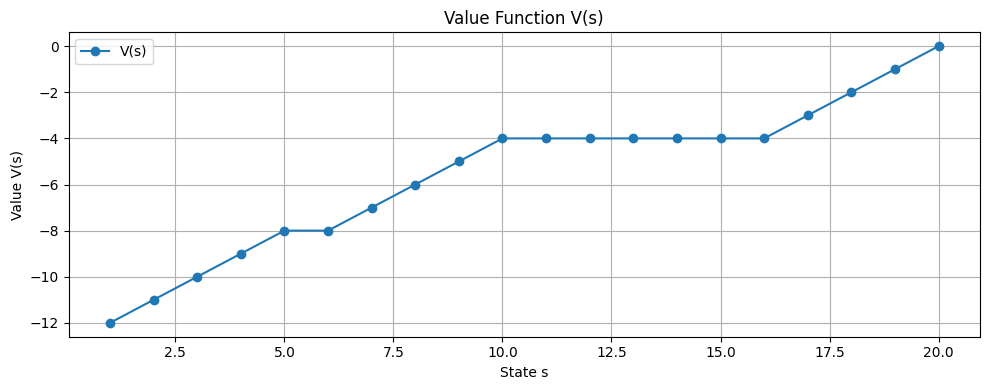

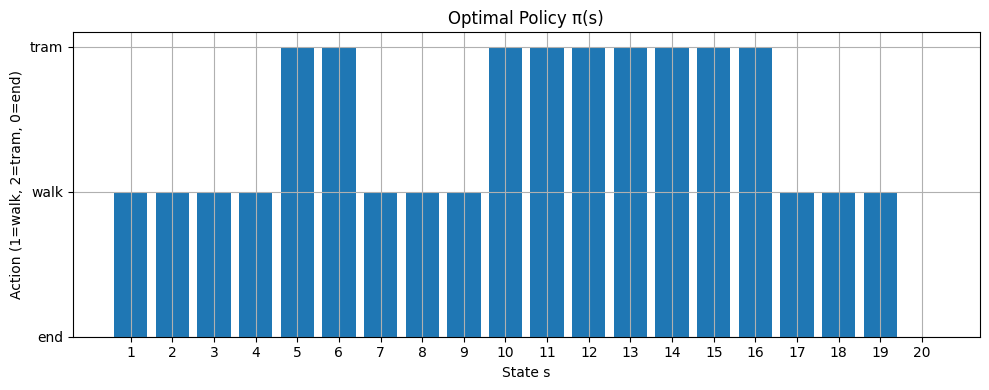

In [1]:

import matplotlib.pyplot as plt

# Define the MDP class
class TransportationMDP:
    def __init__(self, N, p_success=0.5):
        self.N = N
        self.p_success = p_success

    def states(self):
        return list(range(1, self.N + 1))

    def actions(self, state):
        if self.is_end(state):
            return []
        return ['walk', 'tram']

    def is_end(self, state):
        return state == self.N

    def transitions(self, state, action):
        if action == 'walk':
            next_state = min(state + 1, self.N)
            return [(next_state, 1.0, -1)]
        elif action == 'tram':
            success_state = min(2 * state, self.N)
            return [
                (success_state, self.p_success, -2),
                (state, 1 - self.p_success, -2)
            ]
        else:
            return []

    def discount(self):
        return 1.0  # undiscounted cost


# Value iteration algorithm
def value_iteration(mdp, epsilon=1e-10):
    V = {s: 0 for s in mdp.states()}
    pi = {}

    def Q(s, a):
        return sum(
            prob * (reward + mdp.discount() * V[s_prime])
            for s_prime, prob, reward in mdp.transitions(s, a)
        )

    while True:
        delta = 0
        new_V = {}
        for s in mdp.states():
            if mdp.is_end(s):
                new_V[s] = 0
                pi[s] = None
            else:
                q_values = [(Q(s, a), a) for a in mdp.actions(s)]
                best_q, best_a = max(q_values)
                new_V[s] = best_q
                pi[s] = best_a
                delta = max(delta, abs(V[s] - new_V[s]))
        V = new_V
        if delta < epsilon:
            break

    return V, pi


# Run simulation
N = 20
mdp = TransportationMDP(N=N)
V, pi = value_iteration(mdp)

# Print results
print(f"{'State':>5} {'V(s)':>10} {'pi(s)':>10}")
for s in mdp.states():
    print(f"{s:5} {V[s]:10.4f} {str(pi[s]):>10}")

# Prepare data for plotting
states = mdp.states()
values = [V[s] for s in states]
actions = [pi[s] if pi[s] is not None else 'END' for s in states]
action_map = {'walk': 1, 'tram': 2, 'END': 0}
action_codes = [action_map[a] for a in actions]

# Plot Value Function
plt.figure(figsize=(10, 4))
plt.plot(states, values, marker='o', label='V(s)')
plt.title('Value Function V(s)')
plt.xlabel('State s')
plt.ylabel('Value V(s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Optimal Policy
plt.figure(figsize=(10, 4))
plt.bar(states, action_codes, tick_label=states)
plt.title('Optimal Policy π(s)')
plt.xlabel('State s')
plt.ylabel('Action (1=walk, 2=tram, 0=end)')
plt.yticks([0, 1, 2], ['end', 'walk', 'tram'])
plt.grid(True)
plt.tight_layout()
plt.show()
